In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
import os 


sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported!")
print(f"TensorFlow version: {tf.__version__}")


train_dir = 'train'
test_dir = 'test'


if not os.path.exists(train_dir):
    print(f"Error: โฟลเดอร์ '{train_dir}' ไม่พบ. กรุณาตรวจสอบว่าคุณแตกไฟล์ Kaggle และวางไว้ในโฟลเดอร์โปรเจกต์ถูกต้องแล้ว")
    raise SystemExit
if not os.path.exists(test_dir):
    print(f"Error: โฟลเดอร์ '{test_dir}' ไม่พบ. กรุณาตรวจสอบว่าคุณแตกไฟล์ Kaggle และวางไว้ในโฟลเดอร์โปรเจกต์ถูกต้องแล้ว")
    raise SystemExit

print(f"Train directory: {os.listdir(train_dir)}")
print(f"Test directory: {os.listdir(test_dir)}")
print(f"Train Cats: {len(os.listdir(os.path.join(train_dir, 'cats')))} images")
print(f"Train Dogs: {len(os.listdir(os.path.join(train_dir, 'dogs')))} images")
print(f"Test Cats: {len(os.listdir(os.path.join(test_dir, 'cats')))} images")
print(f"Test Dogs: {len(os.listdir(os.path.join(test_dir, 'dogs')))} images")

Libraries imported!
TensorFlow version: 2.20.0
Train directory: ['cats', 'dogs']
Test directory: ['cats', 'dogs']
Train Cats: 10000 images
Train Dogs: 10000 images
Test Cats: 2500 images
Test Dogs: 2500 images


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (150, 150) 
BATCH_SIZE = 32      


train_datagen = ImageDataGenerator(
    rescale=1./255,        
    shear_range=0.2,       
    zoom_range=0.2,        
    horizontal_flip=True   
)

test_datagen = ImageDataGenerator(
    rescale=1./255         
)

print("กำลังสร้าง Train Generator...")
train_generator = train_datagen.flow_from_directory(
    train_dir,                   
    target_size=IMG_SIZE,        
    batch_size=BATCH_SIZE,       
    class_mode='binary'          
)

print("\nกำลังสร้าง Validation Generator (จากโฟลเดอร์ Test)...")
validation_generator = test_datagen.flow_from_directory(
    test_dir,                    
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

print("\n--- สร้าง Generator สำเร็จ! ---")
print("Class Indices:", train_generator.class_indices)

กำลังสร้าง Train Generator...
Found 20000 images belonging to 2 classes.

กำลังสร้าง Validation Generator (จากโฟลเดอร์ Test)...
Found 5000 images belonging to 2 classes.

--- สร้าง Generator สำเร็จ! ---
Class Indices: {'cats': 0, 'dogs': 1}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dropout(0.5)) 

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print("--- สร้างโมเดล CNN สำเร็จ! ---")

model.summary()

--- สร้างโมเดล CNN สำเร็จ! ---


c:\Users\kanth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
EPOCHS = 15 

print("--- 🚀 เริ่มต้นการสอนโมเดล (Training) 🚀 ---")
print(f"จะสอนทั้งหมด {EPOCHS} epochs (รอบ)...")
print("ขั้นตอนนี้จะใช้เวลานานมาก... ไปชงกาแฟรอได้เลยครับ ☕")

history = model.fit(
    train_generator,                   
    steps_per_epoch=train_generator.samples // BATCH_SIZE, 
    epochs=EPOCHS,                     
    validation_data=validation_generator, 
    validation_steps=validation_generator.samples // BATCH_SIZE 
)

print("\n--- ✅ การสอนโมเดลเสร็จสิ้น! ---")

--- 🚀 เริ่มต้นการสอนโมเดล (Training) 🚀 ---
จะสอนทั้งหมด 15 epochs (รอบ)...
ขั้นตอนนี้จะใช้เวลานานมาก... ไปชงกาแฟรอได้เลยครับ ☕
Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 316s 503ms/step - accuracy: 0.6144 - loss: 0.6608 - val_accuracy: 0.6759 - val_loss: 0.6054
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 222s 354ms/step - accuracy: 0.7116 - loss: 0.5659 - val_accuracy: 0.7696 - val_loss: 0.4835
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 238s 381ms/step - accuracy: 0.7620 - loss: 0.4912 - val_accuracy: 0.8057 - val_loss: 0.4242
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 161s 258ms/step - accuracy: 0.7968 - loss: 0.4382 - val_accuracy: 0.8241 - val_loss: 0.3945
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 151s 242ms/step - accuracy: 0.8177 - loss: 0.4027 - val_accuracy: 0.8297 - val_loss: 0.3907
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 156s 250ms/step - accuracy: 0.8312 - loss: 0.3822 - val_accuracy: 0.8305 - val_loss: 0.3665
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 156s 249ms/step - accuracy: 0.8439 - loss

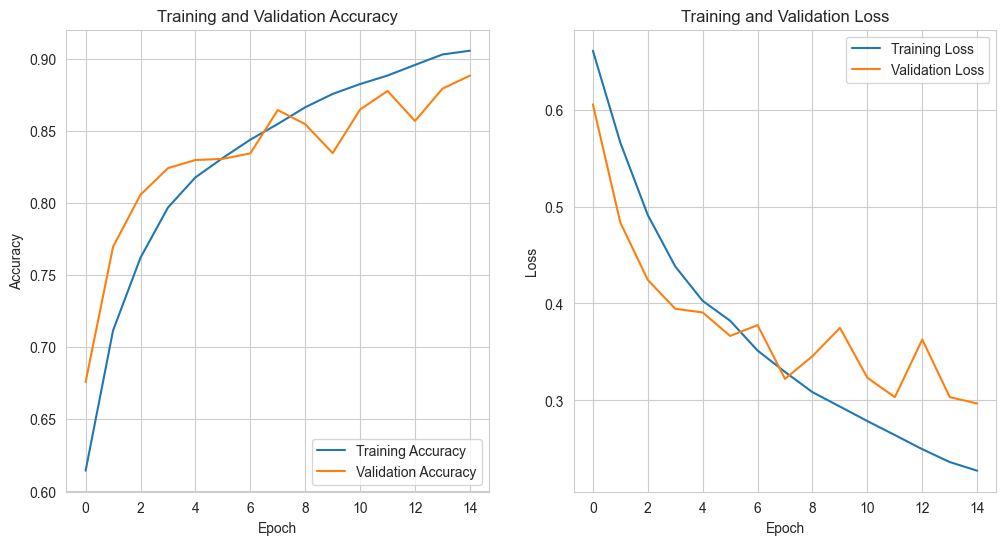

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc)) 


plt.figure(figsize=(12, 6))

# กราฟที่ 1: Accuracy
plt.subplot(1, 2, 1) # (1 แถว, 2 คอลัมน์, กราฟที่ 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# กราฟที่ 2: Loss
plt.subplot(1, 2, 2) # (1 แถว, 2 คอลัมน์, กราฟที่ 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [ ]:
print("--- 🏁 กำลังประเมินผลโมเดลครั้งสุดท้าย 🏁 ---")
final_loss, final_accuracy = model.evaluate(validation_generator)

print("\n--- ✅ ผลลัพธ์สุดท้าย ---")
print(f"Final Loss (บน Test Set): {final_loss:.4f}")
print(f"Final Accuracy (บน Test Set): {final_accuracy * 100:.2f}%")

--- 🏁 กำลังประเมินผลโมเดลครั้งสุดท้าย 🏁 ---
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.8880 - loss: 0.2970

--- ✅ ผลลัพธ์สุดท้าย ---
Final Loss (บน Test Set): 0.2970
Final Accuracy (บน Test Set): 88.80%
